# Ames Housing Pre-Processing and Training

## Step 1:  Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

## Step 2:  Load the Data

In [2]:
housing_data = pd.read_csv('housing_data_cleaned.csv')

In [3]:
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,0,3,2010,WD,Normal,189900


##  Step 3: Impute Values

In [4]:
housing_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Gar

In [5]:
fill_mean = ['Lot Frontage', 'Lot Area', 'Gr Liv Area']


In [6]:
fill_mode = ['PID', 'MS SubClass', 'MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation',   'Electrical', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual','Functional',  'Yr Sold']

In [67]:
housing_data['Condition 2'].mode()

0    Norm
dtype: object

In [68]:
housing_data['Exterior 2nd'].mode()

0    VinylSd
dtype: object

#### note.  I am not imputing values regarding things like basement, pool, garage, air conditioning etc which may not be present .  

In [7]:
for item in fill_mean:
    housing_data[item].fillna(housing_data[item].mean(), inplace = True)


In [8]:
for thing in fill_mode:
    housing_data[thing].fillna(housing_data[thing].mode(), inplace = True)

In [9]:
print(housing_data.isna().sum())

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 78, dtype: int64


## Step 4: Create Dummy Variables

#### If you recall from our EDA, our data had quite a few 'object' variables.  Here we are going to create Dummy Variables so we can analyze both our numeric and our object variables

In [10]:
housing_data.head()
housing_data.shape

(2930, 78)

In [11]:
df = pd.get_dummies(housing_data, drop_first = True)
df = df.dropna()
df = df.drop(columns=['Order'])
df = df.drop(columns = ['Overall Qual'])
df.shape


(2747, 244)

####  IMPORTANT NOTE:  I am dropping Overall Qual Variable here.  In EDA we determined this was subjective and had an outsized impact on our model.  Also I am dropping 'Order' variable.  This is just a numbering of our variables and is not predictive.

## Step 5: Train - Test Split


In [12]:
df_y = df[['SalePrice']]
df_y.shape

(2747, 1)

In [13]:
df_X = df.drop(columns=['SalePrice'])
df_X.shape

(2747, 243)

In [14]:
X = df_X
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

## Step 6: Scale the Data


In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 1.06103417,  1.56977117, -0.0162602 , ..., -0.12360608,
         0.45474778, -0.31130629],
       [-0.94703025,  2.5500974 , -2.16574455, ..., -0.12360608,
         0.45474778, -0.31130629],
       [-0.90613009, -0.14579973, -0.0162602 , ..., -0.12360608,
         0.45474778, -0.31130629],
       ...,
       [ 1.08095583, -0.63596285, -0.12199299, ..., -0.12360608,
         0.45474778, -0.31130629],
       [-0.94157237, -0.8810444 ,  0.68600182, ..., -0.12360608,
        -2.19902116,  3.21227043],
       [ 1.04482158,  0.34436338, -0.78740047, ..., -0.12360608,
        -2.19902116, -0.31130629]])

## Step 7:  Random Forest 

#### We are just starting with a random forest model on our scaled data. 

In [17]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_scaled, y_train)

C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_17404/3250843.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [18]:
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

In [19]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9823802306732438, 0.8674184426556487)

In [20]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(6235.715703883495, 18029.541528384278)

#### Next we can make a Random Forest with a Pipeline and then use grid parameters to see random forest n_estimators and if it is better to scale or not

In [21]:
pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47))

In [22]:
rf_default_cv_results = cross_validate(pipe_rf, X_train, y_train, cv=5)
rf_default_cv_results

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

{'fit_time': array([4.11175084, 3.82161236, 3.83523393, 3.87930274, 3.83727264]),
 'score_time': array([0.03122616, 0.03124714, 0.01562738, 0.01562643, 0.0156374 ]),
 'test_score': array([0.88596006, 0.87614691, 0.90091932, 0.86836473, 0.82931991])}

In [23]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.88596006, 0.87614691, 0.90091932, 0.86836473, 0.82931991])

In [24]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [25]:
rf_grid_cv = GridSearchCV(pipe_rf, param_grid=grid_params, cv=5, n_jobs=-1)

In [26]:
rf_grid_cv.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [27]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 379,
 'standardscaler': StandardScaler()}

#### Grid parameters suggest using 379n_estimators and to use a standard scaler.  

## Random Forest Feature Importance


In [28]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

array([0.88918317, 0.87523298, 0.90259938, 0.86937503, 0.83058765])

In [29]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.8733956441589605, 0.024307077152556637)

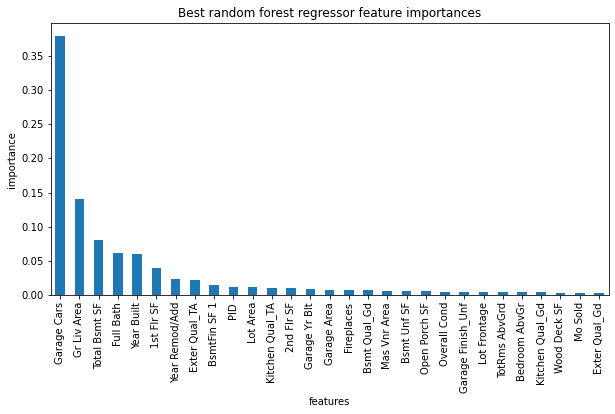

In [30]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns, ).sort_values(ascending=False)
rf_feat_imps = rf_feat_imps[rf_feat_imps > .003]
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [31]:
rf_feat_imps.head(25)

Garage Cars          0.379273
Gr Liv Area          0.140829
Total Bsmt SF        0.080701
Full Bath            0.060745
Year Built           0.060263
1st Flr SF           0.039150
Year Remod/Add       0.023003
Exter Qual_TA        0.021517
BsmtFin SF 1         0.014004
PID                  0.011622
Lot Area             0.011047
Kitchen Qual_TA      0.010821
2nd Flr SF           0.010385
Garage Yr Blt        0.008207
Garage Area          0.007770
Fireplaces           0.007468
Bsmt Qual_Gd         0.007277
Mas Vnr Area         0.006234
Bsmt Unf SF          0.005616
Open Porch SF        0.005081
Overall Cond         0.004975
Garage Finish_Unf    0.004821
Lot Frontage         0.004809
TotRms AbvGrd        0.004767
Bedroom AbvGr        0.003592
dtype: float64

## Random Forest with Best Parameters ()

In [32]:
pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=379, random_state=47))

In [33]:
pipe_rf.fit(X_train_scaled, y_train)

C:\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=379, random_state=47))])

In [34]:
y_train_pred = pipe_rf.predict(X_train_scaled)
y_test_pred = pipe_rf.predict(X_test_scaled)

In [35]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9836171258079072, 0.8671958300012604)

In [36]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(6120.015587775701, 17872.25203458116)

#### Ha.  well that doesnt really improve things that much!!! 

##  Step 8:  How about Linear Regression too

In [37]:
lm = LinearRegression().fit(X_train_scaled, y_train)

In [38]:
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)

In [39]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.9077058983573961, -3.2083053750835253e+21)

In [40]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(15253.477658863205, 175282258217817.97)

#### This mean absolute error on the test set is too big and the r2 score is negative so something is amiss.  Perhaps too much noise in the model.  I am therefore going to use a pipeline to include a SelectKBest to limit the variables in the model. The default here is k = 10.

In [41]:
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression())

In [42]:
pipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000213DAFE19D0>)),
                ('linearregression', LinearRegression())])

In [43]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [44]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.7415747433822291, 0.773442447609425)

In [45]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(25510.600652592122, 25796.619400414627)

#### OK cool.  Not as good as the Random Forest Model but at least the r2 is positive and the mean absolute error is reasonable.

In [46]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

In [47]:
cv_scores = cv_results['test_score']
cv_scores

array([0.74798113, 0.74869169, 0.80287764, 0.77932647, 0.4537947 ])

In [48]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [49]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [50]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [51]:
lr_grid_cv.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000213DAFE19D0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [52]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [53]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 60}

#### In an attempt to improve our pipeline I looked at optimizing the SelectKBest parameter.  Here we are told a parameter of 60 is best.  So the next steps will reviewing our pipeline with this new parameter.

In [54]:
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k = 60),
    LinearRegression())

In [55]:
pipe.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=60,
                             score_func=<function f_regression at 0x00000213DAFE19D0>)),
                ('linearregression', LinearRegression())])

In [56]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [57]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.8382416663416138, 0.855173008264372)

In [58]:
mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)

(20000.1692463174, 20585.554654291405)

In [59]:
#### Yeah this is definitely an improvement from our first linear regression model

## Step 9:  Use a model to predict sales price on a test case 

In [60]:
X_bm = X_test.iloc[27, :]

X_bm.shape

(243,)

In [61]:
X_train.shape

(2060, 243)

In [62]:
X_bm = X_bm.transpose
X_bm

<bound method IndexOpsMixin.transpose of PID                       528186190.0
MS SubClass                     120.0
Lot Frontage                     48.0
Lot Area                       6240.0
Overall Cond                      5.0
                             ...     
Sale Condition_AdjLand            0.0
Sale Condition_Alloca             0.0
Sale Condition_Family             0.0
Sale Condition_Normal             0.0
Sale Condition_Partial            1.0
Name: 1725, Length: 243, dtype: float64>

In [63]:
bm_pred = pipe.predict(X_test.iloc[27, :].array.reshape(1, -1))

In [64]:
bm_pred


array([[247319.1551686]])

In [65]:
tester = X_test.iloc[27, :]
print("Garage Cars: " +   str(tester['Garage Cars']))
print("Yr Sold: " +   str(tester['Yr Sold']))
print("Gr Liv Area: " +   str(tester['Gr Liv Area']))
print("Year Built: " +   str(tester['Year Built']))
print("Total Bsmt SF: " +   str(tester['Total Bsmt SF']))
print("1st Flr SF : " +   str(tester['1st Flr SF']))
print("Exter Qual_TA: " +   str(tester['Exter Qual_TA']))
print("2nd Flr SF: " +   str(tester['2nd Flr SF']))
print("PID : " +   str(tester['PID']))

Garage Cars: 2.0
Yr Sold: 2007.0
Gr Liv Area: 1324.0
Year Built: 2006.0
Total Bsmt SF: 1324.0
1st Flr SF : 1324.0
Exter Qual_TA: 0.0
2nd Flr SF: 0.0
PID : 528186190.0


In [66]:
housing_data_tester = housing_data[housing_data['Gr Liv Area'] == 1324]
housing_data_tester1 = housing_data_tester[housing_data_tester['Year Built'] == 2006]
housing_data_tester2 = housing_data_tester1[housing_data_tester['Yr Sold'] == 2007]
housing_data_tester2


C:\Users\BETH&A~1\AppData\Local\Temp/ipykernel_17404/3475032216.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  housing_data_tester2 = housing_data_tester1[housing_data_tester['Yr Sold'] == 2007]


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1725,1726,528186190,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,0,9,2007,New,Partial,221370


####  If I go back and find the property that matches these conditions we see the actual sales price was USD 221,370 , which is a little less than the predicted sales price of USD 247,319


## Conclusion

We have in this step made some judgment calls and imputed data where and as it was deemed appropriate.  We have created dummy variables to include our categorical variables in our models and have divided our data into test and train sets.  Then we made a first pass at running a few models to see if the work that we have done in our preprocessing and training was ok.  